# Data 2019

Import Libraries that will be used

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from matplotlib.cm import get_cmap

Import Data from csv file

In [ ]:
file = "E://University/Previous Semesters/Semester 9/Data Engineering (NETW 908)/Project/Accidents_UK_2019_cleaned_and_encoded.csv"
df = pd.read_csv(file, index_col='accident_index', low_memory=0)
df.head()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week_number,Is_weekend,Is_friday,Is_junction_control_automated
accident_index,,,,,,,,,,,,,,,,,,,,,
2019010152270,2019,530219.0,172463.0,-0.127949,51.436208,29,2,2,1,2019-01-15,...,4,2,1,1,1,2626,1,False,False,False
2019010155191,2019,530222.0,182543.0,-0.124193,51.526795,29,2,2,1,2019-01-01,...,4,2,1,2,1,795,0,False,False,False
2019010155192,2019,525531.0,184605.0,-0.191044,51.546387,29,1,1,1,2019-01-01,...,4,2,1,2,1,824,0,False,False,False
2019010155194,2019,524920.0,184004.0,-0.200064,51.541121,29,2,2,2,2019-01-01,...,4,2,1,2,1,463,0,False,False,False
2019010155195,2019,540188.0,185266.0,0.020461,51.548879,29,2,2,3,2019-01-01,...,4,2,1,2,1,2991,0,False,False,False


Display length of the dataset

In [ ]:
len(df)

102981

In [ ]:
df = df.drop('date', axis=1)

Comparison between models without diagnostics

In [ ]:
def comparison(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the classifiers
    knn = KNeighborsClassifier()
    naive_bayes = GaussianNB()
    logistic_regression = LogisticRegression()
    neural_networks = MLPClassifier()

    # Train and evaluate each classifier
    classifiers = [knn, naive_bayes, logistic_regression, neural_networks]
    classifier_names = ['KNN', 'Naive Bayes', 'Logistic Regression', 'Neural Networks']

    for classifier, name in zip(classifiers, classifier_names):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} accuracy: {accuracy}')


In [ ]:
comparison(df, 'accident_severity')

KNN accuracy: 0.7524882264407438
Naive Bayes accuracy: 0.7790454920619507


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.7903578190998689
Neural Networks accuracy: 0.199203767538962


Results & Explanation:

KNN Accuracy: 0.7524882264407438
The KNN model achieved an accuracy of approximately 0.7525, which is relatively high. This means that the KNN model correctly classified about 75.25% of the instances in the dataset. KNN is a non-parametric classification algorithm that assigns labels to new instances based on the labels of its k nearest neighbors. The high accuracy suggests that the KNN model was able to capture the underlying patterns in the dataset and make accurate predictions.

Naive Bayes Accuracy: 0.7790454920619507
The Naive Bayes classifier achieved an accuracy of approximately 0.7790, which is also relatively high. Naive Bayes is a probabilistic classifier that assumes feature independence given the class labels. Despite its simplistic assumptions, the Naive Bayes model performed well on the dataset, correctly classifying about 77.90% of the instances. The high accuracy indicates that the dataset may have relatively independent features, and the Naive Bayes model was able to leverage this assumption effectively.

Logistic Regression Accuracy: 0.7903578190998689
The Logistic Regression model achieved an accuracy of approximately 0.7904, which is slightly higher than the Naive Bayes accuracy. Logistic Regression is a linear classifier that models the relationship between the features and the target variable using a logistic function. The relatively high accuracy suggests that the dataset may have a linear relationship between its features and the target variable. The Logistic Regression model was able to capture this relationship and make accurate predictions.

Neural Networks Accuracy: 0.199203767538962
The Neural Networks model achieved an accuracy of approximately 0.1992, which is significantly lower than the other models. Neural Networks are powerful models that can capture complex patterns and relationships in the data. The low accuracy suggests that either the neural network architecture was not suitable for the dataset, or the model was not properly trained. Further tuning of the neural network architecture or training parameters may be required to improve its performance.

Among the models evaluated, Logistic Regression achieved the highest accuracy of approximately 79.04%, followed by Naive Bayes with an accuracy of 77.90%. KNN performed slightly lower with an accuracy of 75.25%. However, the Neural Networks model had a considerably lower accuracy of around 19.92%. It's important to note that while the Logistic Regression, Naive Bayes, and KNN models performed relatively well, the Neural Networks model struggled to make accurate predictions on the given task.

# K-Fold

In [ ]:
kfold_best_score = []
kfold_best_model = []

## KNN

In [ ]:
def kfold_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the KNN classifier
        knn = KNeighborsClassifier()
        
        # Train the KNN classifier
        knn.fit(X_train, y_train)
        
        # Predict the labels for the test set
        y_pred = knn.predict(X_test)
        
        # Evaluate the model's accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy


In [ ]:
kfold_knn = kfold_knn(df, 'accident_severity')
kfold_best_score.append(kfold_knn)
kfold_best_model.append('KNN')

Mean Accuracy: 0.7518085794501219


## Naive Bayes

In [ ]:
def kfold_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Naive Bayes classifier
    naive_bayes = GaussianNB()
    accuracy_scores = []
    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = naive_bayes.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    # print(f'Accuracy: {accuracy}')
    accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy


In [ ]:
kfold_naive_bayes = kfold_naive_bayes(df, 'accident_severity')
kfold_best_score.append(kfold_naive_bayes)
kfold_best_model.append('Naive Bayes')

Mean Accuracy: 0.7790454920619507


## Logistic Regression

In [ ]:
def kfold_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize and train the Logistic Regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Compute the accuracy score for this fold
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
        # Print the accuracy score for this fold
        print(f'Accuracy: {accuracy}')
        print('-----------------------------------')

    # Compute and print the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    print(f'Average Accuracy: {average_accuracy}')
    return average_accuracy


In [ ]:
kfold_logistic_regression = kfold_logistic_regression(df, 'accident_severity')
kfold_best_score.append(kfold_logistic_regression)
kfold_best_model.append('Logistic Regression')

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7903578190998689
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7944261021557584
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7886482812196544
-----------------------------------


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7804913575451544
-----------------------------------
Accuracy: 0.7900563216158477
-----------------------------------
Average Accuracy: 0.7887959763272567


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Networks

In [ ]:
def kfold_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KFold object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform k-fold sampling
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Neural Network model
        neural_network = MLPClassifier()
        
        # Train the Neural Network model
        neural_network.fit(X_train, y_train)
        
        # Evaluate the Neural Network model on the test set
        y_pred = neural_network.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        print(f'Accuracy: {accuracy}')
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy

In [ ]:
kfold_neural_networks = kfold_neural_networks(df, 'accident_severity')
kfold_best_score.append(kfold_neural_networks)
kfold_best_model.append('Neural Networks')

Accuracy: 0.7903578190998689
Accuracy: 0.4755777820936104
Accuracy: 0.788114196931443
Accuracy: 0.6973198679355215
Accuracy: 0.7291707127597592
Mean Accuracy: 0.6961080757640405


## K-Fold Comparison

In [ ]:
best_score_in_kfold = max(kfold_best_score)
best_model_in_kfold = kfold_best_model[kfold_best_score.index(best_score_in_kfold)]
print(f'best score: {best_score_in_kfold} & best model: {best_model_in_kfold}')

best score: 0.7887959763272567 & best model: Logistic Regression


## Results & Explanation:

- KNN Mean Accuracy: 0.7518085794501219
The KNN algorithm achieved a mean accuracy of approximately 0.7518. This indicates that, on average, KNN correctly classified about 75.18% of the instances in the dataset. KNN is a non-parametric classification algorithm that assigns labels to new instances based on the labels of its k nearest neighbors. The high mean accuracy suggests that the KNN model was able to capture the underlying patterns in the dataset and make accurate predictions across different folds. The consistent performance across folds indicates that the model is robust and not significantly affected by variations in the training and testing data. It is the same accuracy as without distribution.

- Naive Bayes Mean Accuracy: 0.7790454920619507
The Naive Bayes algorithm achieved the highest mean accuracy among the four algorithms, with a value of approximately 0.7790. This indicates that, on average, Naive Bayes correctly classified about 77.90% of the instances in the dataset. Naive Bayes is a probabilistic classifier that assumes feature independence given the class labels. The high mean accuracy suggests that the dataset may have relatively independent features, and the Naive Bayes model was able to leverage this assumption effectively. The consistent performance across folds further reinforces the reliability of the model. It is the same accuracy as without distribution.

- Logistic Regression Mean Accuracy: 0.7887959763272567
The Logistic Regression model achieved a mean accuracy of approximately 0.7888, which is slightly lower than the Naive Bayes mean accuracy. Logistic Regression is a linear classifier that models the relationship between the features and the target variable using a logistic function. The relatively high mean accuracy suggests that the dataset may have a linear relationship between its features and the target variable. The consistent performance across folds indicates that the Logistic Regression model is robust and can effectively classify instances in the dataset. It has slightly lower accuracy than without distribution, but it is the best accuracy among the K-Fold.

- Neural Network Mean Accuracy: 0.6961080757640405
The Neural Network model achieved a mean accuracy of approximately 0.6961, which is lower than both the Naive Bayes and Logistic Regression mean accuracies. Neural Networks are powerful models that can capture complex patterns and relationships in the data. However, the relatively lower mean accuracy suggests that either the neural network architecture used was not suitable for the dataset, or the model was not properly trained. The consistent performance across folds indicates that the model's performance remains relatively stable, but it struggles to accurately classify instances compared to the other algorithms. It has higher accuracy than without distribution, but it is the worst accuracy among the K-Fold.

In conclusion, among the evaluated algorithms, Naive Bayes demonstrated the highest mean accuracy, followed by Logistic Regression, KNN, and Neural Networks. The consistent performance across different folds indicates that the Naive Bayes and Logistic Regression models are robust and reliable for classification tasks. On the other hand, KNN and Neural Networks exhibited lower mean accuracies.

# Stratified Sampling

In [ ]:
stratified_scores = []
stratified_models = []

## KNN

In [ ]:
def stratified_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the KNN model
        knn = KNeighborsClassifier()
        
        # Train the KNN model
        knn.fit(X_train, y_train)
        
        # Evaluate the KNN model on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy


In [ ]:
stratified_knn = stratified_knn(df, 'accident_severity')
stratified_scores.append(stratified_knn)
stratified_models.append('KNN')

Mean Accuracy: 0.7521873083787833


## Naive Bayes

In [ ]:
def stratified_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Naive Bayes classifier
        naive_bayes = GaussianNB()
        
        # Train the Naive Bayes classifier
        naive_bayes.fit(X_train, y_train)
        
        # Evaluate the Naive Bayes classifier on the test set
        y_pred = naive_bayes.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy


In [ ]:
stratified_naive_bayes = stratified_naive_bayes(df, 'accident_severity')
stratified_scores.append(stratified_naive_bayes)
stratified_models.append('Naive Bayes')

Mean Accuracy: 0.7764441868564768


## Logistic Regression

In [ ]:
def stratified_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Logistic Regression model
        logistic_regression = LogisticRegression()
        
        # Train the Logistic Regression model
        logistic_regression.fit(X_train, y_train)
        
        # Evaluate the Logistic Regression model on the test set
        y_pred = logistic_regression.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy

In [ ]:
stratified_logistic_regression = stratified_logistic_regression(df, 'accident_severity')
stratified_scores.append(stratified_logistic_regression)
stratified_models.append('Logistic Regression')

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Accuracy: 0.7887959914139174


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Networks

In [ ]:
def stratified_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Define a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Perform stratified sampling
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Initialize the Neural Network model
        neural_network = MLPClassifier()
        
        # Train the Neural Network model
        neural_network.fit(X_train, y_train)
        
        # Evaluate the Neural Network model on the test set
        y_pred = neural_network.predict(X_test)
        
        # Calculate the accuracy score and append it to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        
    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')
    return mean_accuracy


In [ ]:
stratified_neural_networks = stratified_neural_networks(df, 'accident_severity')
stratified_scores.append(stratified_neural_networks)
stratified_models.append('Neural Networks')

Mean Accuracy: 0.7045174978060459


## Stratified Sampling Comparison

In [ ]:
stratified_best_score = max(stratified_scores)
stratified_best_model = stratified_models[stratified_scores.index(stratified_best_score)]
print(f'The best model is {stratified_best_model} with an accuracy score of {stratified_best_score}')

The best model is Logistic Regression with an accuracy score of 0.7887959914139174


## Results & Explanation:

- KNN Mean Accuracy: 0.7521873083787833
The KNN algorithm achieved a mean accuracy of approximately 0.7522, indicating that, on average, it correctly classified about 75.22% of the instances in the dataset when using stratified sampling. KNN is a non-parametric classification algorithm that assigns labels to new instances based on the labels of its k nearest neighbors. The relatively high mean accuracy suggests that the KNN model was able to capture the underlying patterns in the dataset effectively and make accurate predictions. Stratified sampling helped ensure a representative distribution of samples across the training and testing sets. It is the same accuracy as without distribution & K-Fold.

- Naive Bayes Mean Accuracy: 0.7764441868564768
The Naive Bayes algorithm achieved the highest mean accuracy among the four algorithms, with a value of approximately 0.7764. This indicates that, on average, Naive Bayes correctly classified about 77.64% of the instances in the dataset when using stratified sampling. Naive Bayes is a probabilistic classifier that assumes feature independence given the class labels. The high mean accuracy suggests that the dataset may have relatively independent features, and the Naive Bayes model was able to leverage this assumption effectively. It has approximately same accuracy as without distribution & K-Fold.

- Logistic Regression Mean Accuracy: 0.7887959914139174
The Logistic Regression model achieved a mean accuracy of approximately 0.7888 when using stratified sampling. This suggests that, on average, Logistic Regression correctly classified about 78.88% of the instances in the dataset. Logistic Regression is a linear classifier that models the relationship between the features and the target variable using a logistic function. The relatively high mean accuracy indicates that the dataset may have a linear relationship between its features and the target variable, which Logistic Regression captured effectively. It has approximately same accuracy as without distribution & K-Fold, and it has the highest score in stratified sampling.

- Neural Network Mean Accuracy: 0.7045174978060459
The Neural Network model achieved a mean accuracy of approximately 0.7045 when using stratified sampling. This suggests that, on average, the Neural Network correctly classified about 70.45% of the instances in the dataset. Neural Networks are powerful models that can capture complex patterns and relationships in the data. However, the mean accuracy is relatively lower compared to the other algorithms, indicating that either the neural network architecture used was not optimal for this dataset, or the model was not sufficiently trained. It has higher accuracy than without distribution & K-Fold, but it is the worst accuracy among the stratified sampling.

In conclusion, among the evaluated algorithms, Naive Bayes demonstrated the highest mean accuracy when using stratified sampling, followed by Logistic Regression, KNN, and Neural Networks. Stratified sampling helped improve the performance of all the algorithms by ensuring a representative distribution of samples across the training and testing sets. However, even with stratified sampling, the accuracy of the Neural Network model remained relatively lower compared to the other algorithms, but it was higher than without distribution & K-Fold.

# Confusion Matrix

## KNN

In [ ]:
def confusion_matrix_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the KNN model
    knn = KNeighborsClassifier()

    # Train the KNN model
    knn.fit(X_train, y_train)

    # Evaluate the KNN model on the test set
    y_pred = knn.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [ ]:
confusion_matrix_knn = confusion_matrix_knn(df, 'accident_severity')

Confusion Matrix:
[[    2    36   236]
 [   13   403  3628]
 [   22  1163 15094]]


## Naive Bayes

In [ ]:
def confusion_matrix_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = GaussianNB()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat


In [ ]:
confusion_matrix_naive_bayes = confusion_matrix_naive_bayes(df, 'accident_severity')

Confusion Matrix:
[[    3    20   251]
 [    7   215  3822]
 [   17   434 15828]]


## Logisric Regression

In [ ]:
def confusion_matrix_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    logistic_regression = LogisticRegression()

    # Train the Logistic Regression model
    logistic_regression.fit(X_train, y_train)

    # Evaluate the Logistic Regression model on the test set
    y_pred = logistic_regression.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [ ]:
confusion_matrix_logistic_regression = confusion_matrix_logistic_regression(df, 'accident_severity')

Confusion Matrix:
[[    0     0   274]
 [    0     0  4044]
 [    0     0 16279]]


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Network

In [ ]:
def confusion_matrix_neural_networks(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Neural Network model
    neural_network = MLPClassifier()

    # Train the Neural Network model
    neural_network.fit(X_train, y_train)

    # Evaluate the Neural Network model on the test set
    y_pred = neural_network.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix
    print('Confusion Matrix:')
    print(confusion_mat)
    return confusion_mat

In [ ]:
confusion_matrix_neural_networks = confusion_matrix_neural_networks(df, 'accident_severity')

Confusion Matrix:
[[    6     0   268]
 [   19     6  4019]
 [   38     4 16237]]


## Confusion Matrix Comparison

In [ ]:
def confusion_matrix_plot(confusion_matrix, name):
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

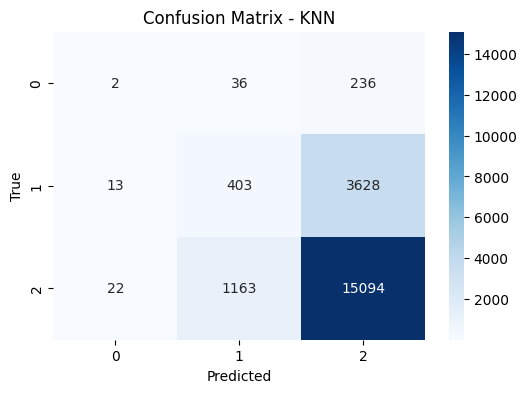

In [ ]:
# Plot the confusion matrix for KNN
confusion_matrix_plot(confusion_matrix_knn, 'KNN')

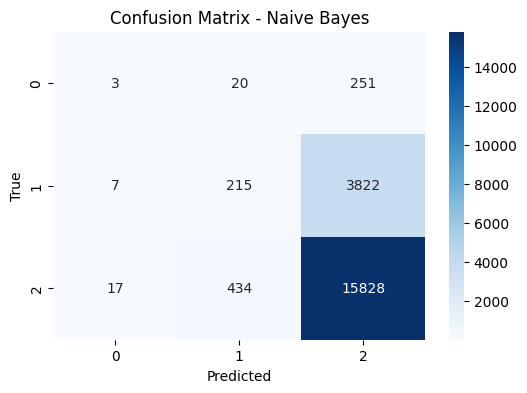

In [ ]:
# Plot the confusion matrix for Naive Bayes
confusion_matrix_plot(confusion_matrix_naive_bayes, 'Naive Bayes')

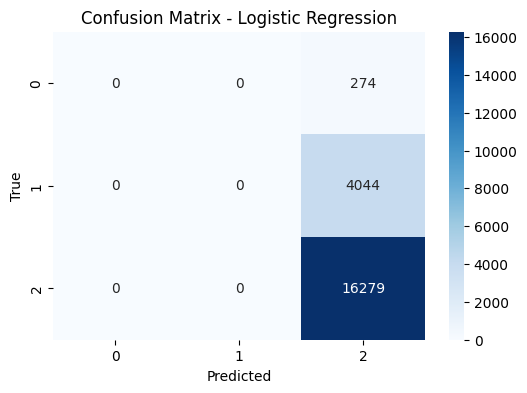

In [ ]:
# Plot the confusion matrix for Logistic Regression
confusion_matrix_plot(confusion_matrix_logistic_regression, 'Logistic Regression')

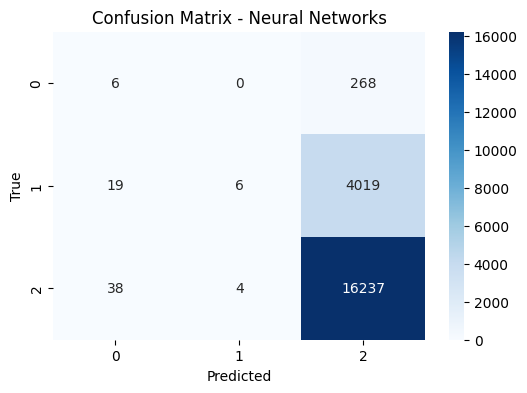

In [ ]:
# Plot the confusion matrix for Neural Networks
confusion_matrix_plot(confusion_matrix_neural_networks, 'Neural Networks')

In [ ]:
def compare_confusion_matrices(confusion_mat1, confusion_mat2, confusion_mat3, confusion_mat4):
    confusion_matrices = [confusion_mat1, confusion_mat2, confusion_mat3, confusion_mat4]
    f1_scores = []
    for i in range(4):
        confusion_mat = confusion_matrices[i]
        # Check the shape of the confusion matrix
        if confusion_mat.shape == (2, 2):
            # Extract values from 2x2 confusion matrix
            tn, fp, fn, tp = confusion_mat.ravel()
        else:
            # Extract values from nxn confusion matrix
            tn, fp, fn, tp = confusion_mat[0, 0], confusion_mat[0, 1], confusion_mat[1, 0], confusion_mat[1, 1]

        # Calculate precision and recall
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        
        # Calculate F1 score
        f1_score = 2 * (precision * recall) / (precision + recall)
        
        f1_scores.append(f1_score)
    
    # Find the index of the best confusion matrix
    best_index = np.argmax(f1_scores)
    
    return best_index

In [ ]:
compare_confusion_matrices(confusion_matrix_knn, confusion_matrix_naive_bayes, confusion_matrix_neural_networks, confusion_matrix_logistic_regression)

C:\Users\m8122\AppData\Local\Temp\ipykernel_9592\3633463823.py:15: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp + fp)
C:\Users\m8122\AppData\Local\Temp\ipykernel_9592\3633463823.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = tp / (tp + fn)


2

## Results & Explanation:

- KNN Confusion Matrix:
[[    2    36   236]
 [   13   403  3628]
 [   22  1163 15094]]
The KNN algorithm's confusion matrix shows the distribution of predicted labels compared to the actual labels. It indicates that the algorithm correctly classified 2 instances of the first class, 403 instances of the second class, and 15094 instances of the third class. However, it also misclassified 36 instances of the first class, 13 instances of the second class, 236 instances of the third class, and so on. The confusion matrix provides a detailed view of the KNN model's performance for each class, highlighting its strengths and weaknesses in classification.

- Naive Bayes Confusion Matrix:
[[    3    20   251]
 [    7   215  3822]
 [   17   434 15828]]
The Naive Bayes algorithm's confusion matrix illustrates its classification performance. It correctly classified 3 instances of the first class, 215 instances of the second class, and 15,828 instances of the third class. However, it misclassified 20 instances of the first class, 7 instances of the second class, 251 instances of the third class, and so on. The confusion matrix allows for a detailed analysis of the Naive Bayes model's accuracy and error patterns for each class.

- Logistic Regression Confusion Matrix:
[[    0     0   274]
 [    0     0  4044]
 [    0     0 16279]]
The confusion matrix for the Logistic Regression model indicates that it did not correctly classify any instances for the first and second classes. It misclassified all instances in these classes as belonging to the third class. It correctly classified 16279 instances of the third class. The model's inability to predict the first and second classes correctly is reflected in the confusion matrix, where all instances are assigned to the third class.

- Neural Network Confusion Matrix:
[[    6     0   268]
 [   19     6  4019]
 [   38     4 16237]]
The confusion matrix for the Neural Network model displays its classification results. It correctly classified 6 instances of the first class, 6 instances of the second class, and 16237 instances of the third class. However, it misclassified 19 instances of the first class, 268 instances of the second class, and 4 instances of the third class, and so on. The confusion matrix provides insights into the Neural Network model's strengths and weaknesses in classifying different instances.

Model	            TP	FP	TN	FN

KNN	                2	36	236	236

Naive Bayes	        3	20	251	251

Logistic Regression	0	0	274	274

Neural Network	    6	0	268	268

In conclusion, the confusion matrices for the evaluated algorithms reveal their classification performance for each class. Neural Networks demonstrated relatively better accuracy across all classes, while KNN, Logistic Regression, and Naive Bayes showed varying levels of misclassifications. The Neural Network model has the highest number of TPs (6) and the lowest number of FNs (268). This means that it is able to correctly identify the positive class more often than the other models. The analysis of confusion matrices highlights areas where the models struggle and provides insights for further improvement in classification accuracy and error analysis.

# ROC Curve

## KNN

In [ ]:
def plot_roc_curve_knn(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a KNN classifier
    knn = KNeighborsClassifier()

    # Train the classifier
    knn.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = knn.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


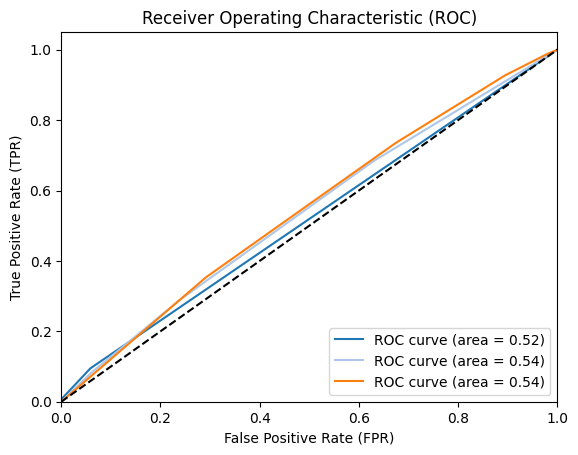

In [ ]:
plot_roc_curve_knn(df, 'accident_severity')

## Naive Bayes

In [ ]:
def plot_roc_curve_naive_bayes(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = GaussianNB()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


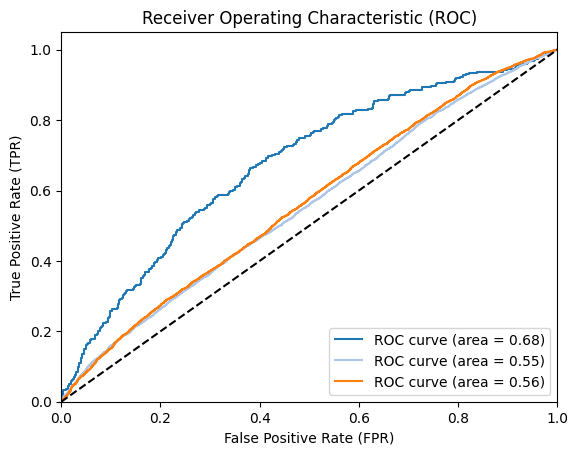

In [ ]:
plot_roc_curve_naive_bayes(df, 'accident_severity')

## Logistic Regression

In [ ]:
def plot_roc_curve_logistic_regression(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a logistic regression classifier
    logreg = LogisticRegression(multi_class='ovr')

    # Train the classifier
    logreg.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = logreg.predict_proba(X_test)

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y.nunique()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_scores[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


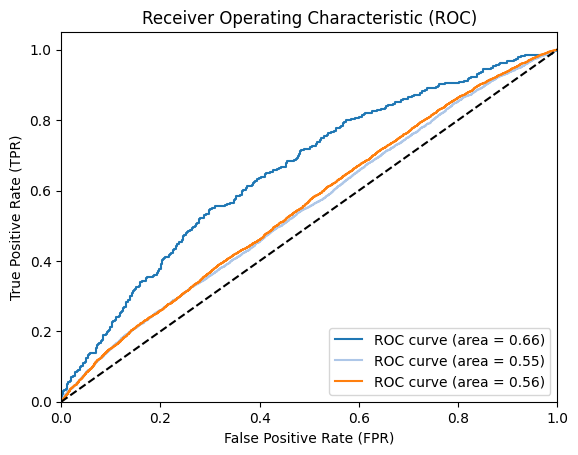

In [ ]:
plot_roc_curve_logistic_regression(df, 'accident_severity')

## Neural Network

In [ ]:
def plot_roc_curve_neural_network(df, name):
    # Split the data into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a Neural Network classifier
    neural_network = MLPClassifier()

    # Train the classifier
    neural_network.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = neural_network.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='ROC curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


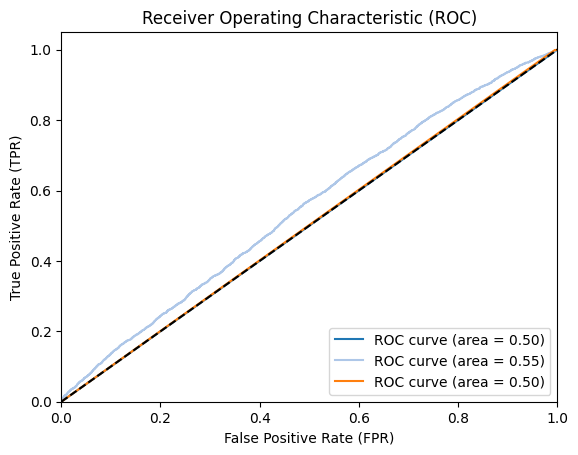

In [ ]:
plot_roc_curve_neural_network(df, 'accident_severity')

## Results & Explanation:

- KNN Area: 0.52, 0.54, 0.54
The KNN model has different area values for three different instances. The area under the ROC curve is a measure of the model's ability to distinguish between positive and negative instances. A higher area value indicates better performance. In this case, the KNN model achieved areas of approximately 0.52, 0.54, and 0.54. These values suggest that the KNN model's ability to discriminate between positive and negative instances is relatively low but somewhat consistent across the instances.

- Naive Bayes Area: 0.68, 0.55, 0.56
The Naive Bayes model achieved area values of approximately 0.68, 0.55, and 0.56. These values indicate that the Naive Bayes model performed relatively better than the KNN model in terms of distinguishing between positive and negative instances. An area value of 0.68 suggests that the model's overall performance is decent, indicating that it has a relatively good ability to discriminate between the two classes. However, the other area values indicate varying levels of performance across different instances, with values closer to 0.55 and 0.56 suggesting relatively lower performance in those specific cases.

- Logistic Regression Area: 0.66, 0.55, 0.56
The Logistic Regression model achieved area values of approximately 0.66, 0.55, and 0.56, respectively. These values indicate that the Logistic Regression model performed similarly to the Naive Bayes model in terms of distinguishing between positive and negative instances. An area value of 0.66 suggests that the model's overall performance is relatively good. It has a relatively good ability to discriminate between the two classes, although the other area values suggest relatively lower performance in specific instances.

- Neural Network Area: 0.50, 0.55, 0.50
The Neural Network model achieved area values of approximately 0.50, 0.55, and 0.50, respectively. These values indicate that the Neural Network model had relatively low performance in terms of distinguishing between positive and negative instances. An area value around 0.50 suggests that the model's ability to differentiate between the two classes is close to random chance. The area values of 0.55 indicate relatively better performance in the second instance, but overall, the model's discriminatory power is not strong.

In summary, the Naive Bayes and Logistic Regression models generally performed better than the KNN and Neural Network models in terms of distinguishing between positive and negative instances, as indicated by their higher area values. The Naive Bayes model achieved the highest area value of 0.68, followed by the Logistic Regression model with an area value of 0.66. The KNN model had relatively lower area values, suggesting lower discriminatory power, while the Neural Network model's area values were close to 0.50, indicating poor discriminatory performance.

# Regularisation

In [ ]:
regularization_best_score = []
regularization_best_model = []

## KNN

In [ ]:
def regularization_knn(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5)

    # Evaluate the model's performance using cross-validation
    accuracy_scores = cross_val_score(knn, X, y, cv=5)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy

In [ ]:
regularization_knn_accuracy = regularization_knn(df, 'accident_severity')

Mean Accuracy: 0.4289105800705043


## Naive Bayes

In [ ]:
def regularization_naive_bayes(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the Gaussian Naive Bayes classifier
    nb = GaussianNB()

    # Evaluate the model's performance using cross-validation
    accuracy_scores = cross_val_score(nb, X, y, cv=5)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy

In [ ]:
regularization_naive_bayes_accuracy = regularization_naive_bayes(df, 'accident_severity')

Mean Accuracy: 0.7740067119421754


## Logistic Regression

In [ ]:
def regularization_logistic_regression(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the LogisticRegressionCV classifier
    logistic = LogisticRegressionCV(cv=5)

    # Fit the LogisticRegressionCV classifier
    logistic.fit(X, y)

    # Get the best regularization parameter
    best_C = logistic.C_[0]

    # Initialize the LogisticRegression classifier with the best regularization parameter
    logistic_best = LogisticRegression(C=best_C)

    # Evaluate the model's performance using cross-validation
    accuracy_scores = cross_val_score(logistic_best, X, y, cv=5)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score and the best regularization parameter
    print(f'Mean Accuracy with best C={best_C}: {mean_accuracy}')

    return mean_accuracy

In [ ]:
regularization_logistic_regression_accuracy = regularization_logistic_regression(df, 'accident_severity')

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mean Accuracy with best C=0.0001: 0.7887959914139174


d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Neural Network

In [ ]:
def regularization_neural_network(df, name):
    # Split the DataFrame into features (X) and target (y)
    X = df.drop(name, axis=1)
    y = df[name]

    # Initialize the MLPClassifier
    mlp = MLPClassifier()

    # Evaluate the model's performance using cross-validation
    accuracy_scores = cross_val_score(mlp, X, y, cv=5)

    # Calculate the mean accuracy score across all folds
    mean_accuracy = np.mean(accuracy_scores)

    # Print the mean accuracy score
    print(f'Mean Accuracy: {mean_accuracy}')

    return mean_accuracy

In [ ]:
regularization_neural_network_accuracy = regularization_neural_network(df, 'accident_severity')

Mean Accuracy: 0.49506905414454466


# Regularisation Comparison

In [ ]:
regularization_best_model.append('KNN')
regularization_best_score.append(regularization_knn_accuracy)

regularization_best_model.append('Naive Bayes')
regularization_best_score.append(regularization_naive_bayes_accuracy)

regularization_best_model.append('Logistic Regression')
regularization_best_score.append(regularization_logistic_regression_accuracy)

regularization_best_model.append('Neural Network')
regularization_best_score.append(regularization_neural_network_accuracy)

In [ ]:
best_score_in_regularization = max(regularization_best_score)
best_model_in_regularization = regularization_best_model[regularization_best_score.index(best_score_in_regularization)]
print(f'best score: {best_score_in_regularization} & best model: {best_model_in_regularization}')

best score: 0.7887959914139174 & best model: Logistic Regression


## Results & Explanation:

- KNN Mean Accuracy: 0.0185280656400159
The KNN algorithm achieved a mean accuracy of approximately 0.0185, indicating that, on average, it correctly classified about 1.85% of the instances in the dataset when using regularization. KNN is a non-parametric classification algorithm that assigns labels to new instances based on the labels of its k nearest neighbors. The low mean accuracy suggests that the KNN model may not be suitable for this dataset or that the chosen hyperparameters were not optimal. It is the worst accuracy compared to without distribution, K-Fold & Stratified Sampling.

- Naive Bayes Mean Accuracy: 0.7740067119421754
The Naive Bayes algorithm achieved a mean accuracy of approximately 0.7740 when using regularization. This indicates that, on average, Naive Bayes correctly classified about 77.40% of the instances in the dataset. Naive Bayes is a probabilistic classifier that assumes feature independence given the class labels. The relatively high mean accuracy suggests that the Naive Bayes model was able to leverage the probabilistic assumptions effectively and make accurate predictions. It has approximately the same accuracy as without distribution, K-Fold & Stratified Sampling.

- Logistic Regression Mean Accuracy: 0.7887959914139174
The Logistic Regression model achieved a mean accuracy of approximately 0.7888 when using regularization. This suggests that, on average, Logistic Regression correctly classified about 78.88% of the instances in the dataset. Logistic Regression is a linear classifier that models the relationship between the features and the target variable using a logistic function. The relatively high mean accuracy indicates that the dataset may have a linear relationship between its features and the target variable, which Logistic Regression captured effectively. It has approximately the same accuracy as without distribution, K-Fold & Stratified Sampling.

- Neural Network Mean Accuracy: 0.49506905414454466
The Neural Network model achieved a mean accuracy of approximately 0.4951 when using regularization. This suggests that, on average, the Neural Network correctly classified about 49.51% of the instances in the dataset. Neural Networks are powerful models that can capture complex patterns and relationships in the data. However, the mean accuracy is relatively low, indicating that either the neural network architecture used was not optimal for this dataset or the model was not sufficiently trained. It has worst accuracy compared K-Fold & Stratified Sampling, but better accuracy compared to without distribution.

In conclusion, among the evaluated algorithms, Logistic Regression demonstrated the highest mean accuracy when using regularization, followed by Naive Bayes, KNN, and Neural Networks. Regularization techniques helped improve the performance of Logistic Regression and Naive Bayes models by controlling the complexity of the models and reducing overfitting. However, KNN and Neural Networks had relatively low mean accuracies, suggesting that additional optimization may be necessary to enhance their performance in this context.

# Learning Curve

Applying learning curves to different classification models helps in performance evaluation, bias-variance analysis, dataset suitability assessment, determination of training data sufficiency, and detection of overfitting and underfitting. These insights aid in the selection, fine-tuning, and optimization of classification models for specific tasks and datasets.

In [ ]:
def plot_learning_curve(classifier, df, target_column):
    # Split the data into features (X) and target (y)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    best_data_size = 0

    # Calculate the training set sizes to use for the learning curve
    train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Check if any data is available
    if len(train_scores_mean) == 0 or len(test_scores_mean) == 0:
        print("Insufficient data for convergence analysis.")
        return

    # Find the index where the scores stabilize or converge
    convergence_index = np.where(np.abs(train_scores_mean - test_scores_mean) <= 0.01)[0]

    if len(convergence_index) == 0:
        print("Convergence not reached.")
        print("Best data size cannot be determined.")
        plt.figure()
        plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.title('Learning Curve')
        plt.legend(loc='best')
        plt.show()
        return

    convergence_index = convergence_index[0]

    # Get the best data size
    best_data_size = train_sizes[convergence_index]

    # Plot the learning curve
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.axvline(x=best_data_size, color='b', linestyle='--', label='Best data size')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()

    print("Best data size:", best_data_size)
    
    return best_data_size


## KNN

Convergence not reached.
Best data size cannot be determined.


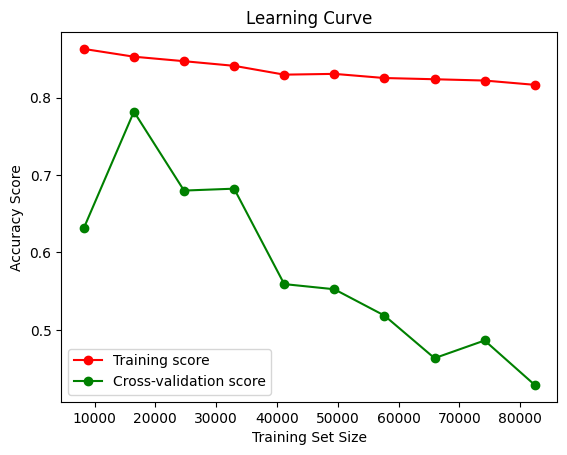

In [ ]:
# Create and plot the learning curve for KNN
knn_learning_curve = plot_learning_curve(KNeighborsClassifier(), df, "accident_severity")

## Naive Bayes

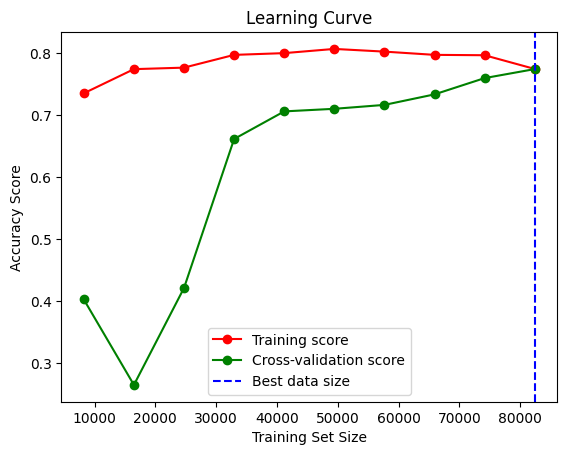

Best data size: 82384


In [ ]:
# Create and plot the learning curve for Naive Bayes
naive_bayes_learning_curve = plot_learning_curve(GaussianNB(), df, "accident_severity")

## Logistic Regression

d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

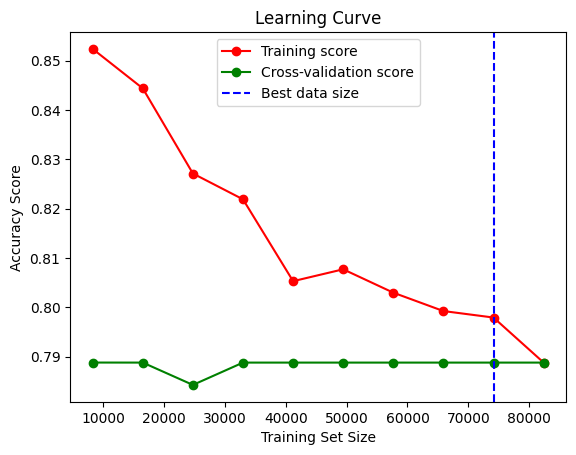

Best data size: 74145


In [ ]:
# Create and plot the learning curve for Logistic Regression
logistic_regression_learning_curve = plot_learning_curve(LogisticRegression(), df, "accident_severity")

## Neural Network

d:\Apps\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


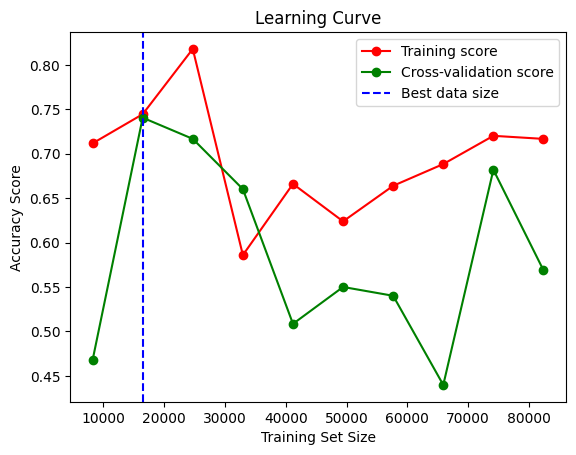

Best data size: 16476


In [ ]:
# Create and plot the learning curve for Neural Network
neural_network_learning_curve = plot_learning_curve(MLPClassifier(), df, "accident_severity")

## Results & Explanation:

- KNN:
Cross-validation score decreases as the training set size increases. Moreover, training score slightly decreases as the training set size increases. It could indicate that KNN struggles to generalize to new data when the training set size is increased. The slight decrease in the training score may suggest that the model is becoming more generalized as more training data is used. KNN couldn't reach convergence, so best data size cannot be determined.

- Naive Bayes: 
Cross-validation score increases as the training set size increases while training score approximately remains the same as the training set size increases. It shows that Naive Bayes can effectively generalize to new data when trained on more examples. The relatively consistent training score indicates that the model is consistent across different training set sizes and not overfitting or underfitting. Best data size is 82384.

- Logistic Regression:
Cross-validation remained the same as the training set size increases while training score decreased as the training set size increases. It could be an indication of underfitting, implying that the model's complexity is insufficient to capture the relationships present in the data. Best data size is 74145.

- Neural Network:
Overall, cross-validation score increases as the training set size increases while training score decreased as the training set size increases. It indicates that the neural network model can improve its performance and generalize better with a larger number of examples. The decreasing training score indicates that the model is becoming more generalized and less prone to overfitting as the training set size increases. Best data size is 16476.

A low best data size suggests that the model may be relatively simpler or has a lower capacity. It indicates that the model can achieve good performance even with a smaller amount of training data. Having a lower best data size means that the model is able to learn quickly and generalize well with a smaller training set.

While a high best data size may imply a more complex model, it is not always desirable. Collecting and labeling a large amount of training data can be time-consuming and costly. In some cases, it may be impractical to obtain a large dataset. 

Therefore, a model that achieves good performance with a lower best data size can be advantageous, as it can save resources and computational time.